# <center> Выполнение тестового задания для Zamwell Asset Management</center>

## Павел Гришенков

#### *Контакты*

* Тел.: 8-912-343-99-18
* Skype: grishenkovpn
* e-mail: grishenkov_p@mail.ru

#### *Hard skills*

* Консультант по табличному редактору **Excel** (VBA)
* Обработка и анализ данных с помощью **Power Query**, **Power Pivot**
* Построение графических отчетов в **Power BI Desktop**, **Tableau** 
* Язык запросов **SQL** (БД Access, PostgreSQL, MS SQL Server, Teradata), запросы на платформе 1С:Предприятие (работа с консолью запросов)
* Программирование на языке **Python** (библиотека NumPy, Pandas, Matplotlib, Seaborn, Scikit-Learn). Примеры кода на https://github.com/GrishenkovP

## <center> 1a </center>

In [1]:
#--Из присланных таблиц реализована демо-база на PostgreSQL (Рассчитать стоимость SWAP только в USD на 2019-09-26)
#SELECT h."PRICE" * h."QUANTITY" as asset_value -- рассчитываем стоимость по каждой операции и выводим значения как отдельный столбец
#FROM public.holdings h LEFT JOIN public.assets a ON h."ASSET_ID" = a."ASSET_ID" -- проводим объединение таблиц (все записи из левой и совпавщие из правой)
#WHERE a."CURRENCY" = 'USD' -- условие 1 валюта 
#AND a."TYPE" ='SWAP' -- условие 2 тип операции
#AND  h."ASOF_DATE" = '2019-09-26' -- условие 3 ограничиваемся конкретной датой
#ORDER BY asset_value DESC; -- сортируем выводимые значения в порядке убывания

In [2]:
# Выгрузка из БД
#"asset_value"
#710907.392719303
#647507.577743027
#350824.685953248
#213749.858367679
#135762.910227444
#704.41929481514
#-72586.444395119
#-331621.56962114


## <center> 1б </center>

In [3]:
#Импортируем библиотеки
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Считываем необходимые данные из файла Excel
path = os.getcwd()
path = '{0}{1}'.format(path.replace('\\','/'),'/interview_data.xlsx' )
holdings = pd.read_excel(path, sheet_name ='holdings')
assets = pd.read_excel(path, sheet_name = 'assets')
rates = pd.read_excel(path, sheet_name = 'rates')

In [5]:
#Имитируем SQL запрос
currency_filter = 'USD'
type_filter = 'SWAP'
date_filter = '2019-09-26'
df = pd.merge(holdings,assets, how='left',on='ASSET_ID').query('CURRENCY == @currency_filter and TYPE == @type_filter and ASOF_DATE == @date_filter')

In [6]:
#Рассчитываем значения для нового столбца
df['asset_value'] = df['PRICE']*df['QUANTITY']

In [7]:
#Сортируем значения в порядке убывания
df = df['asset_value'].sort_values(ascending=False)

In [8]:
#Выводим результат на экран и сравниваем с контрольными значениями из SQL запроса
df

29852     710907.392495
97348     647507.577859
120712    350824.686060
106434    213749.858380
53216     135762.910289
99944        704.419295
116818    -72586.444399
24660    -331621.569623
Name: asset_value, dtype: float64

## <center> 1в </center>

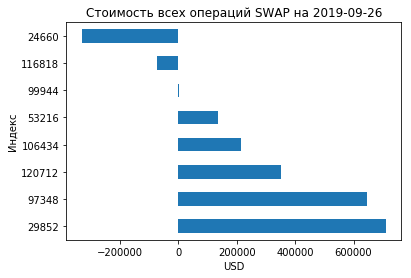

In [9]:
# Строим график
df.plot(kind = 'barh',title='Стоимость всех операций SWAP на 2019-09-26')
plt.xlabel('USD')
plt.ylabel('Индекс')
plt.show()

## <center> 2 </center>

In [10]:
#Объединяем таблицы и ограничиваемся только на акции, ключевое поле - id
type_filter2 = 'EQUITY'
df2 = pd.merge(holdings,assets, how='left',on='ASSET_ID').query('TYPE == @type_filter2').sort_values('ASOF_DATE',ascending=True)

In [11]:
#Подготавливаем таблицу для объединения
rates_pivot = rates.pivot(index = 'ASOF_DATE', columns='CURRENCY_PAIR', values = 'RATE').reset_index()

In [12]:
#Объединяем таблицы, ключевое поле - даты
df2 = pd.merge(df2,rates_pivot, how='left',on='ASOF_DATE')

In [13]:
#Прописываем функцию конвертации валют
def fnConversion(currency_parameter, price_parameter,eur_usd,gbp_usd,usd_jpy):
    if currency_parameter == 'EUR':
        x = price_parameter
        return x
    elif currency_parameter == 'USD':
        x = price_parameter/eur_usd
        return x
    elif currency_parameter == 'GBP':
        x = price_parameter*gbp_usd/eur_usd
        return x
    elif currency_parameter == 'JPY':
        x  = price_parameter/usd_jpy/eur_usd
        return x


In [14]:
#Рассчитываем дополнительный столбец (евро)
df2['PRICE_EUR'] = df2.apply(lambda row: fnConversion(row['CURRENCY'],row['PRICE'],row['EUR/USD'],row['GBP/USD'],row['USD/JPY']),axis=1)

In [15]:
df2.head(5)

,ASSET_ID,ASOF_DATE,PRICE,QUANTITY,TYPE,CURRENCY,EUR/USD,GBP/USD,USD/JPY,PRICE_EUR
0,59fac47c-77d4-4400-80b1-2a2e1ebe9b14,2014-10-08,56.242926,901.745983,EQUITY,JPY,1.2683,1.6068,108.41,0.409050
1,4d106e2a-b528-42f6-b3d9-45ce0813965a,2014-10-08,123.563842,-471.192381,EQUITY,USD,1.2683,1.6068,108.41,97.424775
2,5ccece5b-8a4f-49f0-8fa3-5e54f23deb0a,2014-10-08,60.677306,708.018214,EQUITY,JPY,1.2683,1.6068,108.41,0.441301
3,4a50ef7a-b06a-451d-967e-61d0ffe23046,2014-10-08,100.767791,1233.124764,EQUITY,JPY,1.2683,1.6068,108.41,0.732876
4,b66a5f31-df38-4858-a35f-c5f8a71cff9a,2014-10-08,92.315106,-498.032523,EQUITY,JPY,1.2683,1.6068,108.41,0.671400


In [16]:
#Проводим группировку цен акций по дню. Агрегирующая функуция - среднее
df3 = df2.groupby(by = ['ASOF_DATE'])['PRICE_EUR'].mean()

In [17]:
df3.head(5)

ASOF_DATE
2014-10-08     68.396515
2014-10-09     69.095524
2014-10-10     69.547959
2014-10-13    101.881970
2014-10-14     68.904663
Name: PRICE_EUR, dtype: float64

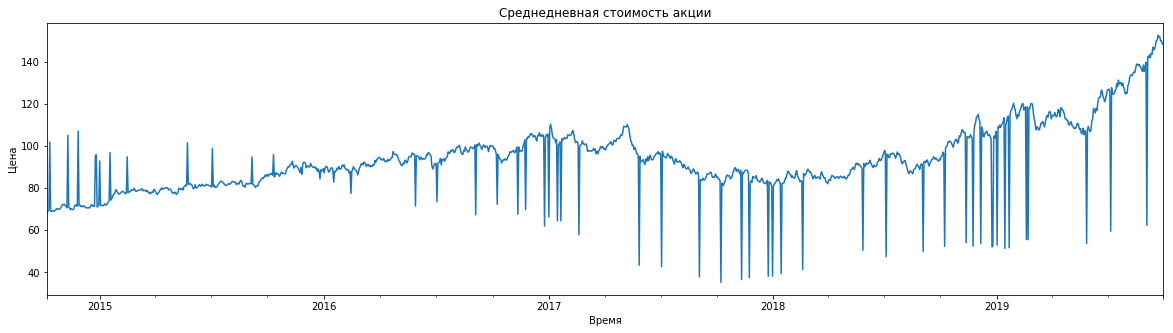

In [18]:
# Строим график
plt.figure(figsize=(20,5))
df3.plot(title='Среднедневная стоимость акции')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.show()

## <center> 3 </center>

In [20]:
# Что касается алгоритма на Python для генерации данных. Вариантов я предложить не могу.
# Конверция валют, данные очень похожи  на реальные, можно было бы преположить парсинг исторических данных с каких-то фин. площадок.
# Что касается PRICE и QUANTITY. 
# QUANTITY по фин. инструментам - разноноправленная тенденция. 
# PRICE - рост от 2014 к 2019, если рассматривать изолированно, то можно было бы описать каким-то уравнением прямой,
# плюс довать случайные колебания в заданном коридоре.
# QUANTITY присутствуют отрицательные значения и дробные, что странно)